In [5]:
from preprocess import data

In [6]:
data['x_germany']

,DATE_FROM,tavg,tmin,tmax,wdir,wspd,wpgt,pres,GERMANY_BLOCK_DEMAND_[MW]
0,2024-01-01,5.7,4.6,7.1,209,14.7,29.6,1005.5,1813
1,2024-01-02,5.0,3.5,6.7,164,14.8,31.5,999.9,1815
2,2024-01-03,8.7,6.9,10.6,218,19.9,44.5,989.8,1813
3,2024-01-04,5.2,1.2,8.5,277,19.3,55.5,997.2,1884
4,2024-01-05,0.6,-0.1,1.5,97,14.6,33.3,1006.2,1757
...,...,...,...,...,...,...,...,...,...
239,2024-08-27,19.2,11.9,26.5,119,9.9,25.9,1023.0,1852
240,2024-08-28,21.8,15.0,29.0,109,13.4,31.5,1020.4,1923
241,2024-08-29,24.2,18.9,30.4,136,12.3,29.6,1016.6,1827
242,2024-08-30,21.6,18.3,26.0,163,11.5,27.8,1016.4,1885


In [7]:
y_ger = data['y_germany']
y_true = y_ger[1:]
y_pred = y_ger.shift(1)[1:]
y_true

12      5.19
24      4.88
36      4.64
48      4.90
60      4.22
        ... 
2868    6.47
2880    6.03
2892    5.44
2904    5.31
2916    7.29
Name: GERMANY_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h], Length: 243, dtype: float64

In [8]:
y_pred

12      5.25
24      5.19
36      4.88
48      4.64
60      4.90
        ... 
2868    7.97
2880    6.47
2892    6.03
2904    5.44
2916    5.31
Name: GERMANY_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h], Length: 243, dtype: float64

In [9]:
from eval import MSE, custom_metric

In [10]:
MSE(y_pred, y_true)

52.3698633744856

In [11]:
y_pred[-50:]

2328     5.67
2340     8.14
2352     7.30
2364     6.18
2376     5.94
2388     5.60
2400     5.30
2412     4.97
2424     7.28
2436     6.43
2448     5.90
2460     5.51
2472     5.47
2484     5.51
2496     5.06
2508     5.09
2520     8.36
2532     5.63
2544     5.21
2556     5.10
2568     4.92
2580     4.68
2592     6.50
2604     9.43
2616     7.62
2628     6.11
2640     5.56
2652     5.01
2664     4.85
2676     5.89
2688     6.82
2700     5.78
2712     5.33
2724     5.90
2736     5.27
2748     4.95
2760     5.84
2772     6.01
2784     5.78
2796     5.45
2808     5.15
2820     4.91
2832     6.44
2844     6.40
2856    16.78
2868     7.97
2880     6.47
2892     6.03
2904     5.44
2916     5.31
Name: GERMANY_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h], dtype: float64

In [ ]:
custom_metric(y_pred, y_true)

897.8263390946503

In [20]:
import seaborn as sns
import pandas as pd
corr = pd.concat([y_pred.reset_index(drop=True), y_true.reset_index(drop=True)], axis=1)
corr.corr()


,GERMANY_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h],GERMANY_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]
GERMANY_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h],1.000000,0.429643
GERMANY_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h],0.429643,1.000000


In [ ]:
np.array(y_pred)

array([ 5.25,  5.19,  4.88,  4.64,  4.9 ,  4.22,  3.95,  3.98,  3.69,
        3.54,  3.47,  3.21,  3.68,  3.13,  3.  ,  3.05,  2.88,  2.78,
        2.59,  4.  ,  6.9 ,  4.56,  3.99,  3.5 ,  3.5 ,  3.17,  3.52,
        4.4 ,  3.98,  3.9 ,  3.65,  3.35,  3.1 ,  3.17,  4.86,  3.4 ,
        3.16,  2.96,  3.44,  2.9 ,  2.83,  2.73,  2.8 ,  2.52,  2.35,
        2.33,  2.11,  2.19,  3.61,  3.07,  2.89,  2.5 ,  2.4 ,  2.2 ,
        3.17,  2.62,  2.67,  2.68, 22.46,  7.21,  4.37,  3.9 ,  3.54,
        3.48,  3.11,  3.24,  3.09,  3.05,  4.62,  7.58,  4.54,  3.88,
        3.48,  3.24,  2.97,  3.96,  3.54,  3.29,  3.04,  3.21,  3.23,
        3.1 ,  8.21,  6.66,  4.97,  4.47,  4.  ,  7.09,  5.56,  9.25,
        8.94,  7.52,  6.64,  6.17,  5.45,  5.03,  5.12,  5.22,  5.09,
        4.76,  4.49,  7.48,  7.7 ,  7.2 ,  6.61,  7.5 ,  6.3 , 72.19,
       19.18, 12.97,  9.86,  8.4 ,  8.97, 10.1 ,  8.69,  8.21,  7.47,
        7.82,  7.32,  7.19,  6.91,  8.06,  6.89,  6.88,  7.12,  6.87,
        6.69,  6.51,

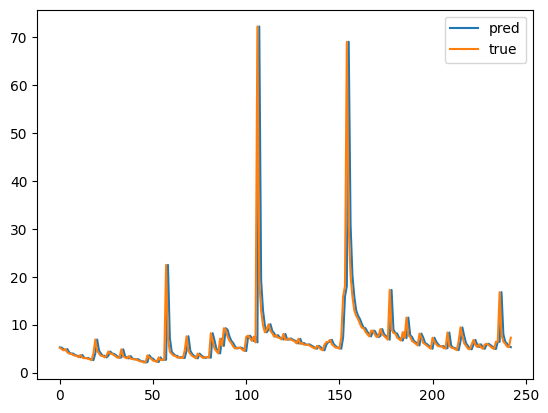

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(y_pred), label="pred")
plt.plot(np.array(y_true), label="true")
plt.legend()

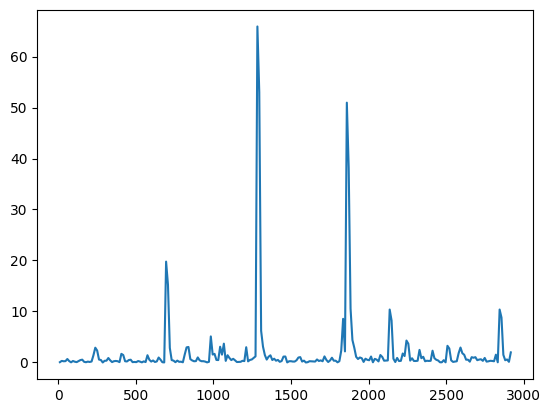

In [ ]:
plt.plot(np.abs(y_pred-y_true))

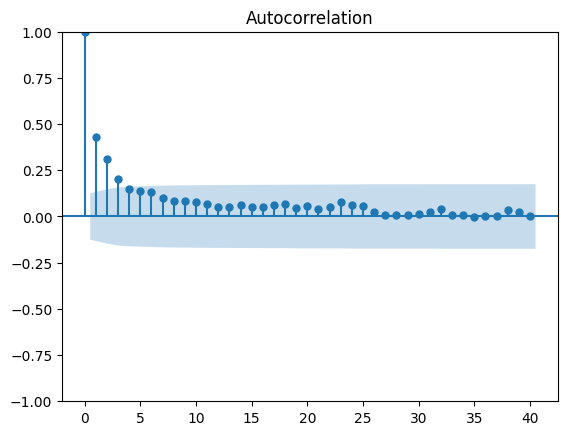

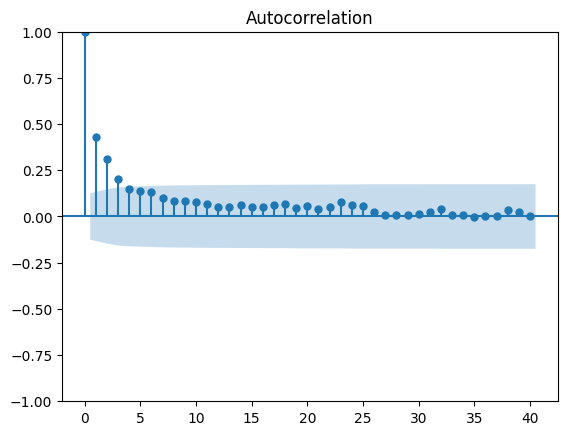

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(y_true, lags=40)